# Analysis of Devnagari Character Recognition using Neural Networks

### <font color="blue">Team: </font>  
### <font color="blue">1)Priyanka Sawant</font>  
### <font color="blue">2)Siddhant Gokule</font>  

# Import necessary libraries

In [1506]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from PIL import Image
import numpy as np
import os
import random
from sklearn import ensemble,preprocessing
import keras.utils.np_utils

# Read the images

## Train the model on all data

* The folder __Train_Full_Data__ contains 36 folders corresponding to each data.
* Each folder contains 1700 images of dimensions 32 * 32.
* All the images are grayscale images

In [1507]:
path = "./Sample/Train_Full_Data/"
folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  62668800


## Convert matrix to array

In [1508]:
a = np.array(imageMatrix)
a
print(a.shape)

(61200, 1024)


## Separate the features and labels of the images

In [1509]:
#define variables
n_samples = len(a)
X = a.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)


Features size =  (61200, 1024)
Labels size =  (61200,)
['yna' 'yna' 'yna' ..., 'jha' 'jha' 'jha']


## Transform categorical variables using Onehot encoding

In [1510]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

## Print the mapping of one hot encoding

In [1511]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'adna': 0, 'ba': 1, 'bha': 2, 'cha': 3, 'chha': 4, 'chhya': 5, 'da': 6, 'daa': 7, 'dha': 8, 'dhaa': 9, 'ga': 10, 'gha': 11, 'gya': 12, 'ha': 13, 'ja': 14, 'jha': 15, 'ka': 16, 'kha': 17, 'kna': 18, 'la': 19, 'ma': 20, 'motosaw': 21, 'na': 22, 'pa': 23, 'patalosaw': 24, 'petchiryakha': 25, 'pha': 26, 'ra': 27, 'taamatar': 28, 'tabala': 29, 'tha': 30, 'thaa': 31, 'tra': 32, 'waw': 33, 'yaw': 34, 'yna': 35}


## Split the data as train and test data

In [1512]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [1513]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (42840, 1024)   (42840, 36)


## Create a Convolution Neural Network for feature extraction 

In [1514]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [1515]:
img_height_rows = 32
img_width_cols = 32

In [1516]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


In [1517]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [1518]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [1519]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [1520]:
# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

In [1521]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [1522]:
# Now add the Dense layers
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [1523]:
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [1524]:
opt = optimizers.Adagrad(lr=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

## Print model summary

In [1525]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 30, 30, 4)         40        
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 12, 12, 4)         148       
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 10, 10, 4)         148       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 100)               0         
__________

## Fit the model on train data and test on test data 

In [1526]:
history = cnn.fit(x_train, T_train,
                  batch_size=100, epochs=10,
                  validation_data=(x_test, T_test))

Train on 42840 samples, validate on 18360 samples
Epoch 1/10
42840/42840 [==============================] - 27s 636us/step - loss: 2.4581 - acc: 0.3239 - val_loss: 1.9653 - val_acc: 0.4409
Epoch 2/10
42840/42840 [==============================] - 25s 588us/step - loss: 1.7785 - acc: 0.4982 - val_loss: 1.6624 - val_acc: 0.5247
Epoch 3/10
42840/42840 [==============================] - 29s 678us/step - loss: 1.5558 - acc: 0.5585 - val_loss: 1.4855 - val_acc: 0.5782
Epoch 4/10
42840/42840 [==============================] - 28s 660us/step - loss: 1.4145 - acc: 0.5949 - val_loss: 1.3734 - val_acc: 0.6127
Epoch 5/10
42840/42840 [==============================] - 29s 688us/step - loss: 1.3105 - acc: 0.6266 - val_loss: 1.2918 - val_acc: 0.6333
Epoch 6/10
42840/42840 [==============================] - 28s 662us/step - loss: 1.2304 - acc: 0.6490 - val_loss: 1.2154 - val_acc: 0.6545
Epoch 7/10
42840/42840 [==============================] - 29s 688us/step - loss: 1.1653 - acc: 0.6640 - val_loss: 1.

#### Display the accuracy of the model

In [1527]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.39%


### Plot the model accuracy over increasing epochs

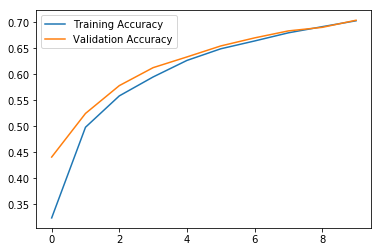

In [1528]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])

## Extract the features from the CNN second last layer

In [1529]:
from keras.models import Model

model = cnn
layer_name= 'dense11'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

#### Use the features extracted from CNN to pass to the classifier for classification 

In [1530]:
x_train = intermediate_output

#### Convert the target encoded back to pass on to the different classifiers

In [1531]:
import numpy as np
T1 = np.argmax(T_train, axis=1)
T1

array([ 9, 14,  6, ..., 13, 21, 29], dtype=int64)

### Split the data in train and test data before passing the features classifier for prediction

In [1532]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(x_train, T1, test_size=0.3, random_state=34)

In [1533]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Create a generic function to run the classifiers and predict accuracy 

In [1547]:
def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken for prediction = %f seconds" % (time.time() - start_time))

    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    acc=accuracy_score(y_test_data, y_pred) * 100
    print("acc=",acc)
    return y_pred,acc


## Pass the features to Random Forest Classifier for predictions

In [1548]:
from sklearn.ensemble import RandomForestClassifier
import time
print('Random Forest Classifier starting ...')
fullDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(fullDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 12.111731 seconds
CNN-Random Forest Accuracy: 71.7%
acc= 71.6542172425


## Pass the features to Multi-Layer Perceptron Classifier for predictions

In [1549]:
from sklearn.neural_network import MLPClassifier
import time
print('Multi-Layer Perceptron Classifier starting ...')
fullDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(fullDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 77.378430 seconds
CNN-Multi-Layer Perceptron Accuracy: 77.3%
acc= 77.2642390289


## Pass the features to KNN Classifier for predictions

In [1553]:
from sklearn.neighbors import KNeighborsClassifier
import time
print('KNN Classifier starting ...')
fullDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(fullDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "SVM Confusion matrix")

KNN Classifier starting ...
Time taken for prediction = 548.301413 seconds
CNN-KNN Accuracy: 80.6%
acc= 80.578898226


In [ ]:
objects = ('RandomForest', 'MLP', 'KNN')
y_pos = np.arange(len(objects))
performance = []
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

# Read a Devanagri word from image and extract its characters using Tesseract OCR

#### <font color="red">Note:Please install the 'tesseract-ocr-setup-3.05.01.exe' file adding the Hindi and Marathi Languages before implemeting code below</font>  

### Read the wod file with Devanagari word and extract characters

### Image 1

<font color="blue">Give the path of tesseract.exe below</font> 

In [1699]:
import pytesseract
im=Image.open("word1.PNG")
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
text=pytesseract.image_to_string(im,lang='hin')

### Store the individual characters as an image file

In [1700]:
from PIL import Image, ImageFont, ImageDraw
import string, random
length=len(text)
for i in range(0,length):
    img=Image.new("RGB", [400, 400])
    font = ImageFont.truetype("mangal.ttf", 200)
    draw = ImageDraw.Draw(img)
    draw.text((125, 30),text[i],(255,255,255),font=font)
    draw = ImageDraw.Draw(img)
    fileName = "./testFiles/word1_"+str(i)+".png"
    img.save(fileName)

### Read the character images shown above to be passed to the classifiers trained on features extracted from CNN 

(1, 1024)

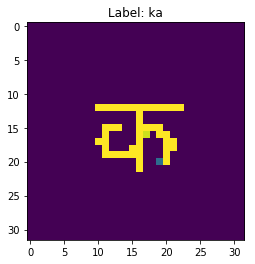

In [1556]:
img=Image.open('./testFiles/word1_0.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title('Label: ka')
plt.imshow(imgData)
# inverted_image.save('new1.jpg')
img.size
# np.set_printoptions(threshold=100)
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

### Try to predict the character using Random Forest Classifier  

In [1557]:
y_pred=fullDataRandomForestClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'tha'

### Try to predict the character using MLP Classifier 

In [1558]:
y_pred=fullDataMLPClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'chha'

### Try to predict the character using KNN Classifier 

In [1559]:
y_pred=fullDataKNNClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'da'

## Image 2 character 1

In [1560]:
import pytesseract
im=Image.open("word2.JPG")
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
text=pytesseract.image_to_string(im,lang='hin')

text0=text[0]
text1=text[1]


In [1561]:
from PIL import Image, ImageFont, ImageDraw
import string, random
length=len(text)
for i in range(0,length):
    img=Image.new("RGB", [400, 400])
    font = ImageFont.truetype("mangal.ttf", 200)
    draw = ImageDraw.Draw(img)
    draw.text((125, 30),text[i],(255,255,255),font=font)
    draw = ImageDraw.Draw(img)
    fileName = "./testFiles/word2_"+str(i)+".png"
    img.save(fileName)

(1, 1024)

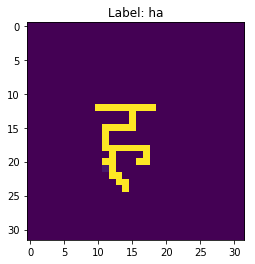

In [1562]:
img=Image.open('./testFiles/word2_1.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.imshow(imgData)
plt.title("Label: ha")
# inverted_image.save('new1.jpg')
img.size
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

In [1563]:
y_pred=fullDataRandomForestClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'dhaa'

In [1564]:
y_pred=fullDataMLPClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'chha'

In [1565]:
y_pred=fullDataKNNClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'chha'

As it can be seen the predictions aren't good enough due to large number of label classes, <font color="blue">36 to be precise</font>. In order to improve the accuracy let's try to train the model on constrained number of samples and check if the accuracy improves.

# Train the model on less data 

### Read the reduced number of images

In [1568]:
path = "./Sample/Train_Partial_Data/"
folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of image matrix = ",np.size(imageMatrix))

Size of image matrix =  13926400


In [1569]:
a = np.array(imageMatrix)
a
print(a.shape)

(13600, 1024)


In [1570]:
import random
from sklearn import ensemble,preprocessing

## Separate the features and images

In [1571]:
#define variables
n_samples = len(a)
X = a.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)


Features size =  (13600, 1024)
Labels size =  (13600,)
['ka' 'ka' 'ka' ..., 'cha' 'cha' 'cha']


## Transform categorical variables using one hot encoding

In [1572]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

## Print the mapping created by one hot encoding

In [1573]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ba': 0, 'cha': 1, 'ga': 2, 'ha': 3, 'ka': 4, 'kna': 5, 'ma': 6, 'yaw': 7}


## Split the data in train and test data

In [1574]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [1575]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (9520, 1024)   (9520, 8)


In [1576]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [1577]:
img_height_rows = 32
img_width_cols = 32

In [1578]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


## Configure the CNN to extract the features

In [1579]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [1580]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [1581]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [1582]:
# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

In [1583]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [1584]:
# Now add the Dense layers
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [1585]:
n_classes = 8
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [1586]:
opt = optimizers.Adagrad(lr=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [1587]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 30, 30, 4)         40        
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 12, 12, 4)         148       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 10, 10, 4)         148       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 100)               0         
__________

In [1588]:
history = cnn.fit(x_train, T_train,
                  batch_size=100, epochs=30,
                  validation_data=(x_test, T_test))

Train on 9520 samples, validate on 4080 samples
Epoch 1/30
9520/9520 [==============================] - 7s 761us/step - loss: 1.2521 - acc: 0.5787 - val_loss: 0.9390 - val_acc: 0.6794
Epoch 2/30
9520/9520 [==============================] - 6s 641us/step - loss: 0.8410 - acc: 0.7148 - val_loss: 0.8257 - val_acc: 0.7169
Epoch 3/30
9520/9520 [==============================] - 6s 621us/step - loss: 0.7498 - acc: 0.7442 - val_loss: 0.7547 - val_acc: 0.7397
Epoch 4/30
9520/9520 [==============================] - 6s 635us/step - loss: 0.6958 - acc: 0.7650 - val_loss: 0.7000 - val_acc: 0.7630
Epoch 5/30
9520/9520 [==============================] - 6s 645us/step - loss: 0.6520 - acc: 0.7771 - val_loss: 0.6704 - val_acc: 0.7752
Epoch 6/30
9520/9520 [==============================] - 6s 633us/step - loss: 0.6167 - acc: 0.7919 - val_loss: 0.6614 - val_acc: 0.7728
Epoch 7/30
9520/9520 [==============================] - 7s 684us/step - loss: 0.5867 - acc: 0.8009 - val_loss: 0.6143 - val_acc: 0.7917


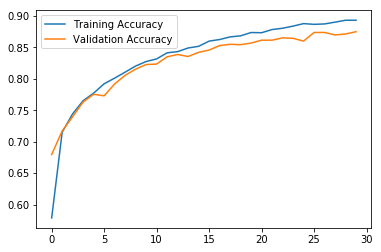

In [1589]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])

### Print the accuracy of the model

In [1590]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.48%


### Extract the features from the CNN 

In [1591]:
from keras.models import Model

model = cnn
layer_name= 'dense11'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

### Pass the features extracted from CNN to classifiers for prediction 

In [1592]:
x_train = intermediate_output

### Convert the target labels back to be passed to the classifiers

In [1593]:
import numpy as np
T1 = np.argmax(T_train, axis=1)
T1

array([3, 1, 5, ..., 5, 7, 5], dtype=int64)

### Split the data into train and test data

In [1594]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(x_train, T1, test_size=0.3, random_state=34)

In [1595]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [1599]:
def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken for prediction = %f seconds" % (time.time() - start_time))
    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    acc=accuracy_score(y_test_data, y_pred) * 100
    return y_pred,acc


In [1600]:
x_train.shape

(9520, 1024)

## Pass the features to Random Forest Classifier for predictions

In [1601]:
from sklearn.ensemble import RandomForestClassifier
import time
print('Random Forest Classifier starting ...')
partialDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(partialDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 1.203011 seconds
CNN-Random Forest Accuracy: 86.8%


## Pass the features to Multi-Layer Perceptron Classifier for predictions

In [1602]:
from sklearn.neural_network import MLPClassifier
import time
print('Multi-Layer Perceptron Classifier starting ...')
partialDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(partialDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 7.513125 seconds
CNN-Multi-Layer Perceptron Accuracy: 90.4%


## Pass the features to KNN Classifier for predictions

In [1603]:
from sklearn.neighbors import KNeighborsClassifier
import time
print('KNN Classifier starting ...')
partialDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(partialDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "SVM Confusion matrix")

KNN Classifier starting ...
Time taken for prediction = 19.928713 seconds
CNN-KNN Accuracy: 90.5%


## Image 1 Character 1

### Read word 1 from image

In [1604]:
import pytesseract
im=Image.open("word1.PNG")
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
text=pytesseract.image_to_string(im,lang='hin')

### Extract Characters from word1

In [1605]:
from PIL import Image, ImageFont, ImageDraw
import string, random
length=len(text)
for i in range(0,length):
    img=Image.new("RGB", [400, 400])
    font = ImageFont.truetype("mangal.ttf", 200)
    draw = ImageDraw.Draw(img)
    draw.text((125, 30),text[i],(255,255,255),font=font)
    draw = ImageDraw.Draw(img)
    fileName = "./testFiles/word1_"+str(i)+".png"
    img.save(fileName)

(1, 1024)

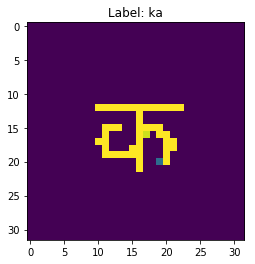

In [1606]:
img=Image.open('./testFiles/word1_0.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title("Label: ka")
plt.imshow(imgData)
# inverted_image.save('new1.jpg')
img.size
# np.set_printoptions(threshold=100)
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

In [991]:
y_pred=partialDataRandomForestClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ba'

In [992]:
y_pred=partialDataMLPClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ka'

In [993]:
y_pred=partialDataKNNClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'yaw'

<font color="blue">It is observed that the actual letter 'ka' is predicted as similar looking characters by some classifiers due to similarity in shapes.</font>

In [1121]:
print("Correct character ka = ","\u0915")
print("Characters similar to this:","\u091A","(cha), "" \u092C","(ba)")

Correct character ka =  क
Characters similar to this: च (cha),  ब (ba)


## Image 1 Character 2

(1, 1024)

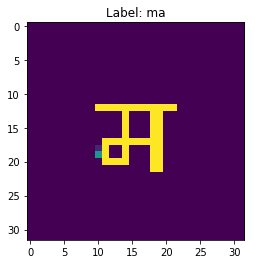

In [1607]:
img=Image.open('./testFiles/word1_1.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title("Label: ma")
plt.imshow(imgData)
# inverted_image.save('new1.jpg')
img.size
# np.set_printoptions(threshold=100)
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

In [921]:
y_pred=partialDataRandomForestClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ma'

In [922]:
y_pred=partialDataMLPClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ga'

In [923]:
y_pred=partialDataKNNClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ba'

Character from image = 

In [1608]:
print("Correct character ma = ","\u092E")
print("Characters similar to this:","\u0917", "(ga)")

Correct character ma =  म
Characters similar to this: ग (ga)


## Image 2 Character 1

In [1609]:
import pytesseract
im=Image.open("word2.JPG")
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
text=pytesseract.image_to_string(im,lang='hin')

text0=text[0]
text1=text[1]


In [1610]:
from PIL import Image, ImageFont, ImageDraw
import string, random
length=len(text)
for i in range(0,length):
    img=Image.new("RGB", [400, 400])
    font = ImageFont.truetype("mangal.ttf", 200)
    draw = ImageDraw.Draw(img)
    draw.text((125, 30),text[i],(255,255,255),font=font)
    draw = ImageDraw.Draw(img)
    fileName = "./testFiles/testFile0_"+str(i)+".png"
    img.save(fileName)

(1, 1024)

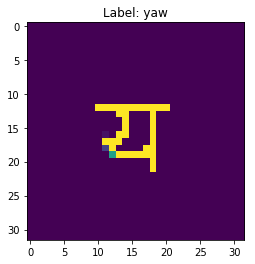

In [1611]:
img=Image.open('./testFiles/word2_0.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title("Label: yaw")
plt.imshow(imgData)
# inverted_image.save('new1.jpg')
img.size
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

In [1612]:
y_pred=partialDataRandomForestClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ga'

In [1613]:
y_pred=partialDataMLPClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ha'

In [1614]:
y_pred=partialDataKNNClassifier.predict(flat)
le.inverse_transform(y_pred[0])

'ka'

In [1616]:
print("Correct character yaw = ","\u092F")
print("Characters similar to this:","\u0916","(kha)")

Correct character yaw =  य
Characters similar to this: ख (kha)


## Image 2 Character 2 

(1, 1024)

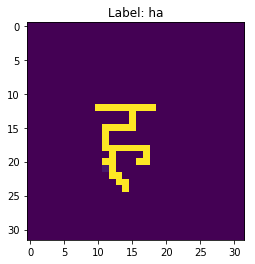

In [1617]:
img=Image.open('./testFiles/word2_1.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title("Label: ha")
plt.imshow(imgData)
# inverted_image.save('new1.jpg')
img.size
flat=imgData.flatten()
np.shape(flat)
flat=flat.reshape(1,-1)
flat.shape

In [1618]:
y_pred=clf1.predict(flat)
le.inverse_transform(y_pred[0])

'ba'

In [1619]:
y_pred=clf2.predict(flat)
le.inverse_transform(y_pred[0])

'yaw'

In [1620]:
y_pred=clf3.predict(flat)
le.inverse_transform(y_pred[0])

'cha'

In [1621]:
print("Correct character ha = ","\u0939")
print("Characters similar to this:","\u0919","(kna)," " \u0921","(da)")

Correct character ha =  ह
Characters similar to this: ङ (kna), ड (da)


## Results discussion

Following were the key points noted during the prediction of printed characters by models trained on handwritten chracter images:

* It was observed that mostly the classifers accuracy depended on the data that they were trained on.
* A large number of label classes caused a decreased performance of the models due to large number of similar looking characters.
* Restricting the training of the models to a limited number of characters improved the performance.
* The features extracted from the CNN and used by classifiers to predict the printed characters affected the prediction accuracy of classifiers.
* It was observed that __KNN Classifier__ generally showed better accuracy as compared to __Random Forest and MLP Classifiers__.
* Certain misclassifcations were observed among similar looking characters, like 'ka' being classified as 'ba' or 'ma' being classified as 'ga' due to simliarity in structures of characters.
* This can be improved by training the CNN model on large amount of data and then extracting the features so that the classifiers accuracy can be improved.
* Cross-validation can be also implemented to if sufficiently large data is available.


# <font color="blue">Cropped images training and prediction</font>

## Use model trained on cropped images to predict full images

* As a part of experimentation we took a small amount of images of few characters and clipped those images randomly.
* Then we trained the model in a similar fashion as above to by providing it with the cropped images as input and their corresponding labels as output.
* This was performed to check how well the model predicts the full image on providing just a part of it while training.
* We did not come across any concept of training the model on a partial image but thought it to be relevant if in real life we just had a portion on characters in images for training.

## Load the images for training

In [1622]:
path = "./Sample/Cropped_Images_For_Training/"
folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.jpg'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
np.size(imageMatrix)

40960

In [1623]:
a = np.array(imageMatrix)
a
print(a.shape)

(40, 1024)


In [1624]:
import random
from sklearn import ensemble,preprocessing

## Separate the features and labels of each image

In [1625]:
#define variables
n_samples = len(a)
X = a.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)


Features size =  (40, 1024)
Labels size =  (40,)
['ka' 'ka' 'ka' 'ka' 'ka' 'ka' 'ka' 'ka' 'ka' 'ka' 'kha' 'kha' 'kha' 'kha'
 'kha' 'kha' 'kha' 'kha' 'kha' 'kha' 'kna' 'kna' 'kna' 'kna' 'kna' 'kna'
 'kna' 'kna' 'kna' 'kna' 'ba' 'ba' 'ba' 'ba' 'ba' 'ba' 'ba' 'ba' 'ba' 'ba']


## Transform the categorical targets using one hot encoding 

In [1626]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

## Print the mapping of one hot encoding 

In [1627]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ba': 0, 'ka': 1, 'kha': 2, 'kna': 3}


## Split the train and test data

In [1628]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [1629]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (28, 1024)   (28, 4)


In [1630]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [1631]:
img_height_rows = 32
img_width_cols = 32

In [1632]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


## Configure CNN 

In [1633]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [1634]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [1635]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [1636]:
# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

In [1637]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [1638]:
# Now add the Dense layers
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [1639]:
n_classes = 4
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [1640]:
opt = optimizers.Adagrad(lr=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [1641]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 30, 30, 4)         40        
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 12, 12, 4)         148       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 10, 10, 4)         148       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 100)               0         
__________

In [1642]:
history = cnn.fit(x_train, T_train,
                  batch_size=100, epochs=10,
                  validation_data=(x_test, T_test))

Train on 28 samples, validate on 12 samples
Epoch 1/10
28/28 [==============================] - 1s 33ms/step - loss: 1.8317 - acc: 0.2857 - val_loss: 1.8038 - val_acc: 0.2500
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 1.6124 - acc: 0.2500 - val_loss: 1.3362 - val_acc: 0.3333
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 1.2099 - acc: 0.5000 - val_loss: 1.5166 - val_acc: 0.3333
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 1.0810 - acc: 0.5714 - val_loss: 1.4043 - val_acc: 0.4167
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.9723 - acc: 0.7143 - val_loss: 1.3971 - val_acc: 0.3333
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.8706 - acc: 0.7143 - val_loss: 1.3463 - val_acc: 0.4167
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.7833 - acc: 0.8214 - val_loss: 1.3659 - val_acc: 0.4167
Epoch 8/10
28/28 [===========================

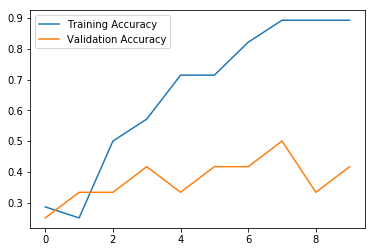

In [1644]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])

## Evaluate the accuracy of model

In [1645]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 41.67%


## Extract the features 

In [1646]:
from keras.models import Model

model = cnn
layer_name= 'dense11'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

## Pass these features to the classifiers

In [1647]:
x_train = intermediate_output

## Convert target label to original labels

In [1648]:
import numpy as np
T1 = np.argmax(T_train, axis=1)
T1

array([2, 0, 2, 2, 2, 0, 1, 2, 3, 3, 1, 0, 3, 3, 0, 1, 3, 3, 0, 2, 3, 2, 2,
       1, 0, 1, 3, 0], dtype=int64)

# Split the data into train and test data

In [1649]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(x_train, T1, test_size=0.3, random_state=34)

In [1650]:
from sklearn.metrics import accuracy_score, confusion_matrix

## A generic function to run different classifiers and evaluate their performance

In [1652]:
def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken for prediction = %f seconds" % (time.time() - start_time))

    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    acc=accuracy_score(y_test_data, y_pred) * 100
    return y_pred,acc


## Pass the features to Random Forest Classifier for predictions

In [1653]:
from sklearn.ensemble import RandomForestClassifier
import time
print('Random Forest Classifier starting ...')
partialDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(partialDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 0.015631 seconds
CNN-Random Forest Accuracy: 55.6%


## Pass the features to Multi-Layer Perceptron Classifier for predictions

In [1654]:
from sklearn.neural_network import MLPClassifier
import time
print('Multi-Layer Perceptron Classifier starting ...')
partialDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(partialDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 0.486338 seconds
CNN-Multi-Layer Perceptron Accuracy: 66.7%


## Pass the features to KNN Classifier for predictions

In [1655]:
from sklearn.neighbors import KNeighborsClassifier
import time
print('KNN Classifier starting ...')
partialDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(partialDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "SVM Confusion matrix")

KNN Classifier starting ...
Time taken for prediction = 0.000000 seconds
CNN-KNN Accuracy: 55.6%


## Predict a full image by using model trained above

### Image 'ba' 

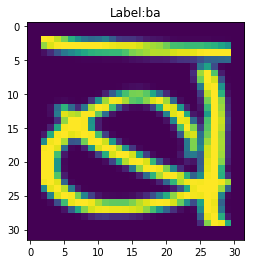

In [1660]:
img11 = Image.open('./Sample/Train_Full_Data/character_23_ba/11206.png')

imageArray = np.asarray(img11)
flattenedImageArray = imageArray.flatten()
z=flattenedImageArray.reshape(1,-1)
plt.imshow(imageArray) 
plt.title('Label:ba')
plt.show()


In [1661]:
print('KNN Classifier prediction = ',le.inverse_transform(partialDataKNNClassifier.predict(z)[0]))
print('MLP Classifier predictionn = ',le.inverse_transform(partialDataMLPClassifier.predict(z)[0]))
print('Random Forest Classifier prediction = ',le.inverse_transform(partialDataRandomForestClassifier.predict(z)[0]))

KNN Classifier prediction =  kha
MLP Classifier predictionn =  kha
Random Forest Classifier prediction =  ba


### Image 'kha'

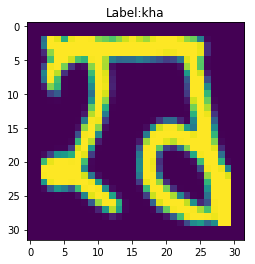

In [1662]:
img11 = Image.open('./Sample/Train_Full_Data/character_2_kha/13205.png')

imageArray = np.asarray(img11)
flattenedImageArray = imageArray.flatten()
z=flattenedImageArray.reshape(1,-1)
plt.imshow(imageArray) 
plt.title('Label:kha')
plt.show()


In [1385]:
print('KNN Classifier prediction = ',le.inverse_transform(partialDataKNNClassifier.predict(z)[0]))
print('MLP Classifier predictionn = ',le.inverse_transform(partialDataMLPClassifier.predict(z)[0]))
print('Random Forest Classifier prediction = ',le.inverse_transform(partialDataRandomForestClassifier.predict(z)[0]))

KNN Classifier prediction =  ba
MLP Classifier predictionn =  kha
Random Forest Classifier prediction =  kha


### Image 'ka'

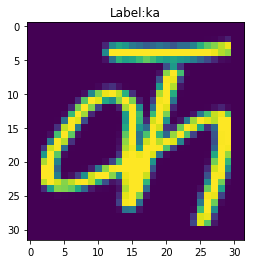

In [1663]:
img11 = Image.open('./Sample/Train_Full_Data/character_1_ka/1414.png')

imageArray = np.asarray(img11)
flattenedImageArray = imageArray.flatten()
z=flattenedImageArray.reshape(1,-1)
plt.imshow(imageArray) 
plt.title('Label:ka')
plt.show()


In [1408]:
print('KNN Classifier prediction = ',le.inverse_transform(partialDataKNNClassifier.predict(z)[0]))
print('MLP Classifier predictionn = ',le.inverse_transform(partialDataMLPClassifier.predict(z)[0]))
print('Random Forest Classifier prediction = ',le.inverse_transform(partialDataRandomForestClassifier.predict(z)[0]))

KNN Classifier prediction =  ba
MLP Classifier predictionn =  kha
Random Forest Classifier prediction =  kha


<font color='blue'> As observed the model correctly predicts 2 out of the 3 images passed images</font>

# Predict cropped images by model trained on full character images 

## Read images

In [1664]:
path = "./Sample/Train_Full_Data/"
folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
np.size(imageMatrix)

62668800

In [1665]:
a = np.array(imageMatrix)
a
print(a.shape)

(61200, 1024)


In [1666]:
# labels

In [1667]:
import random
from sklearn import ensemble,preprocessing

## Extract features and target labels

In [1668]:
#define variables
n_samples = len(a)
X = a.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)


Features size =  (61200, 1024)
Labels size =  (61200,)
['yna' 'yna' 'yna' ..., 'jha' 'jha' 'jha']


# Transform categorical target using one hot encoding

In [1669]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

## Print mapping of one hot encoder

In [1670]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'adna': 0, 'ba': 1, 'bha': 2, 'cha': 3, 'chha': 4, 'chhya': 5, 'da': 6, 'daa': 7, 'dha': 8, 'dhaa': 9, 'ga': 10, 'gha': 11, 'gya': 12, 'ha': 13, 'ja': 14, 'jha': 15, 'ka': 16, 'kha': 17, 'kna': 18, 'la': 19, 'ma': 20, 'motosaw': 21, 'na': 22, 'pa': 23, 'patalosaw': 24, 'petchiryakha': 25, 'pha': 26, 'ra': 27, 'taamatar': 28, 'tabala': 29, 'tha': 30, 'thaa': 31, 'tra': 32, 'waw': 33, 'yaw': 34, 'yna': 35}


## Divide train and test data

In [1671]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [1672]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (42840, 1024)   (42840, 36)


In [1673]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [1674]:
img_height_rows = 32
img_width_cols = 32

In [1675]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


## Configure CNN

In [1676]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [1677]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [1678]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [1679]:
# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

In [1680]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [1681]:
# Now add the Dense layers
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [1682]:
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [1683]:
opt = optimizers.Adagrad(lr=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [1684]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 30, 30, 4)         40        
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 12, 12, 4)         148       
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 10, 10, 4)         148       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_66 (Flatten)         (None, 100)               0         
__________

In [1685]:
history = cnn.fit(x_train, T_train,
                  batch_size=200, epochs=10,
                  validation_data=(x_test, T_test))

Train on 42840 samples, validate on 18360 samples
Epoch 1/10
42840/42840 [==============================] - 31s 725us/step - loss: 2.4921 - acc: 0.3252 - val_loss: 1.9891 - val_acc: 0.4432
Epoch 2/10
42840/42840 [==============================] - 25s 581us/step - loss: 1.7583 - acc: 0.5090 - val_loss: 1.6665 - val_acc: 0.5314
Epoch 3/10
42840/42840 [==============================] - 25s 587us/step - loss: 1.5285 - acc: 0.5680 - val_loss: 1.4995 - val_acc: 0.5703
Epoch 4/10
42840/42840 [==============================] - 25s 580us/step - loss: 1.3889 - acc: 0.6026 - val_loss: 1.3832 - val_acc: 0.5978
Epoch 5/10
42840/42840 [==============================] - 25s 582us/step - loss: 1.2889 - acc: 0.6303 - val_loss: 1.2816 - val_acc: 0.6305
Epoch 6/10
42840/42840 [==============================] - 25s 586us/step - loss: 1.2097 - acc: 0.6508 - val_loss: 1.2066 - val_acc: 0.6535
Epoch 7/10
42840/42840 [==============================] - 26s 608us/step - loss: 1.1404 - acc: 0.6705 - val_loss: 1.

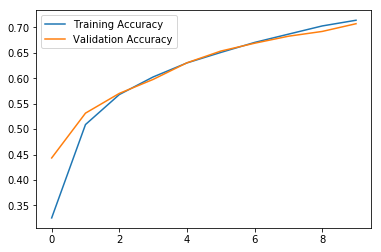

In [1686]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Validation Accuracy'])

## Evaluate model performance

In [1687]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.74%


## Extract features

In [1688]:
from keras.models import Model

model = cnn
layer_name= 'dense11'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

In [1689]:
x_train = intermediate_output

## Convert target variables to categorical

In [1690]:
import numpy as np
T1 = np.argmax(T_train, axis=1)
T1

array([ 9, 14,  6, ..., 13, 21, 29], dtype=int64)

## Split into train and test data

In [1691]:
from sklearn.cross_validation import train_test_split
X_train, X_test, T_train, T_test = train_test_split(x_train, T1, test_size=0.3, random_state=34)

In [1692]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Generic function to call the classifiers and evaluate their performance

In [1694]:
def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
    """run chosen classifier and display results"""
    start_time = time.time()
    clfr.fit(x_train_data, y_train_data)
    y_pred = clfr.predict(x_test_data)
    print("Time taken for prediction = %f seconds" % (time.time() - start_time))

    print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
    acc=accuracy_score(y_test_data, y_pred) * 100
    return y_pred,acc


## Pass the features to Random Forest Classifier for predictions

In [1695]:
from sklearn.ensemble import RandomForestClassifier
import time
print('Random Forest Classifier starting ...')
partialDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(partialDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 9.728068 seconds
CNN-Random Forest Accuracy: 71.2%


## Pass the features to Multi-Layer Perceptron Classifier for predictions

In [1696]:
from sklearn.neural_network import MLPClassifier
import time
print('Multi-Layer Perceptron Classifier starting ...')
partialDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(partialDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "SVM Confusion matrix")

Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 97.135373 seconds
CNN-Multi-Layer Perceptron Accuracy: 77.2%


## Pass the features to KNN Classifier for predictions

In [1697]:
from sklearn.neighbors import KNeighborsClassifier
import time
print('KNN Classifier starting ...')
partialDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(partialDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "SVM Confusion matrix")

KNN Classifier starting ...
Time taken for prediction = 673.694516 seconds
CNN-KNN Accuracy: 81.4%


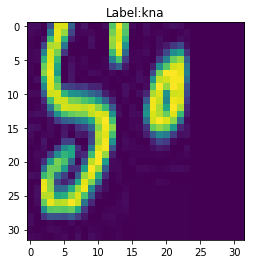

KNN Classifier prediction =  jha
MLP Classifier predictionn =  chha
Random Forest Classifier prediction =  tra


In [1698]:
img11 = Image.open('./Sample/Predict_Cropped_Images/10.jpg')

imageArray = np.asarray(img11)
flattenedImageArray = imageArray.flatten()
z=flattenedImageArray.reshape(1,-1)
plt.imshow(imageArray) 
plt.title('Label:kna')
plt.show()
print('KNN Classifier prediction = ',le.inverse_transform(partialDataKNNClassifier.predict(z)[0]))
print('MLP Classifier predictionn = ',le.inverse_transform(partialDataMLPClassifier.predict(z)[0]))
print('Random Forest Classifier prediction = ',le.inverse_transform(partialDataRandomForestClassifier.predict(z)[0]))

<font color="blue">
- As it can be seen the reverse way of training the model on full images and then using it to predict the cropped images isn't giving correct predictions due to many similar  looking characters.
</font>

# Results discussion about cropped images training and prediction

Key points about the above implementation are:

* The model was trained on cropped character images and then used to predict the full character images.
* On this setup the model was able to predict atleast some characters correctly if not all.
* Model was then trained on full character images and then used to predict the cropped images of characters.
* This caused the degraded model performance due to increased misclassification.
* It is an expected result since croppping of the images may alter their characteristics to transform them into similar looking  other characters thereby causing the model to predict them incorrectly.
* For eg. if character 'ka' is cropped vertically into exact half then left half is exactly same as the character 'waw' this causes the misclassificatio degrading the model performance.

__CONCLUSION__: 
* It was found that model prediction was good when trained on cropped character images and used to predict full characters since the model could look for the features in cropped images and locate them in the full images.
* However if the model was trained on full character images and then a cropped character image was given to it, the accuracy of the model was hampered with possible reason being that the cropped image may look similar to some other character.